In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from src import cleaners as cl

In [2]:
df = pd.read_csv('data/GLODAPv2 Merged Master File.csv')

## First looking at rates of oceanic dissolved organic carbon (ppt) and dissolved organic nitrogen:

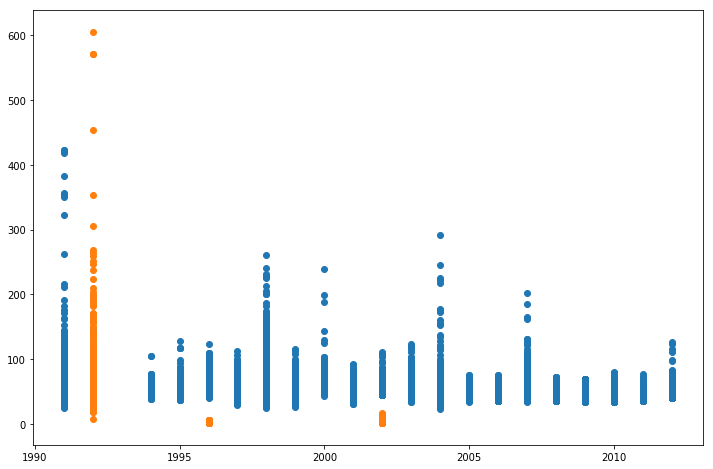

In [6]:
doc = df[['year','doc']]
doc = doc[doc['doc'] != -9999]

don = df[['year','don']]
don = don[don['don'] != -9999]

fig, axs = plt.subplots(1,1, figsize=(12,8));

axs.scatter(doc['year'], doc['doc'])
axs.scatter(don['year'], don['don'])

In [22]:
## Getting a clean simple temp dataframe with two columns: Temperature and Timestamps.
temp = cl.simp_temps(df) # This also creates a timestamp column in df

In [25]:
## Getting daily, monthly and yearly Global Ocean mean temperatures
temp_dmeans, temp_mmeans, temp_ymeans = cl.temp_timely_means(temp)

## We next consider total ocean temperature readings from 1985-2009:

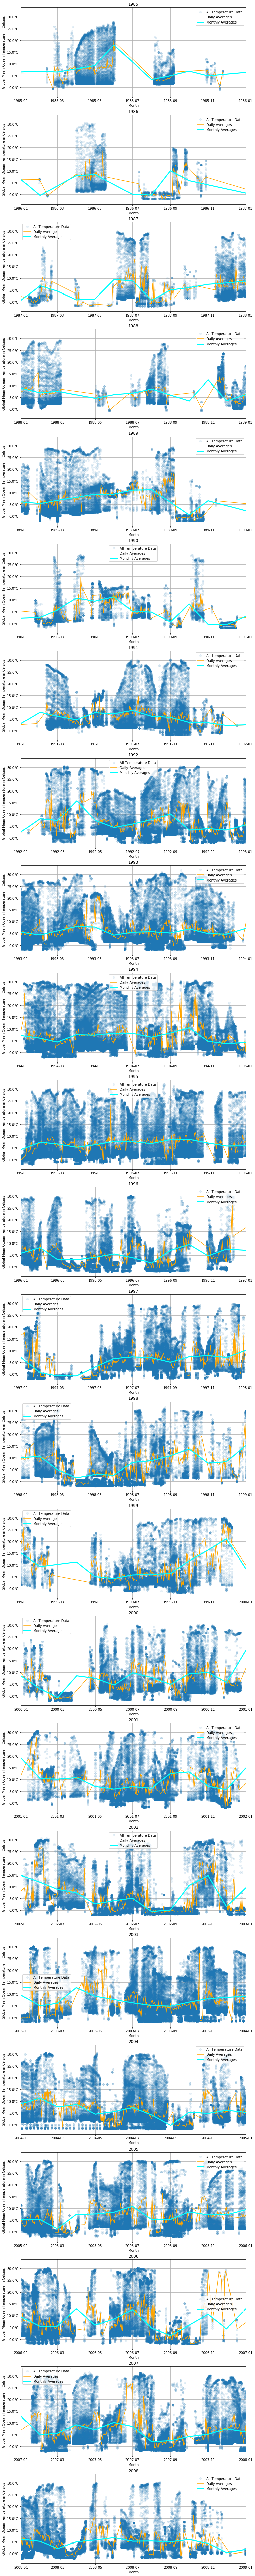

In [30]:
cl.plot_all_temperatures(temp, temp_dmeans, temp_mmeans)

## Summary Graph:

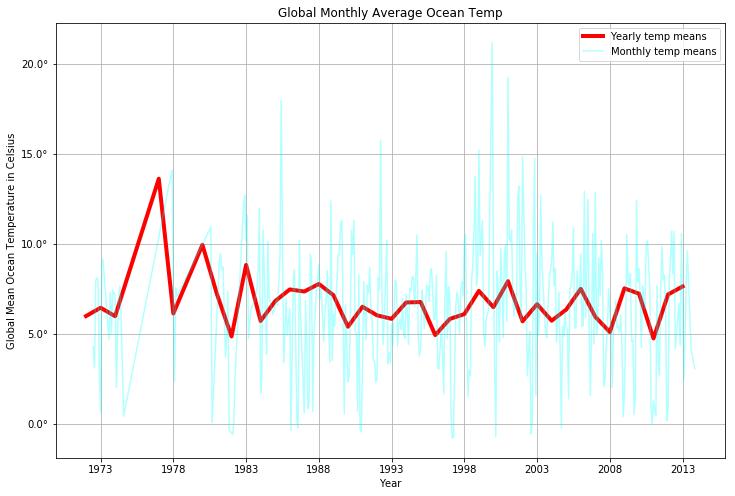

In [31]:
cl.summary_plot(temp_ymeans, temp_mmeans)

## Try with rolling averages:

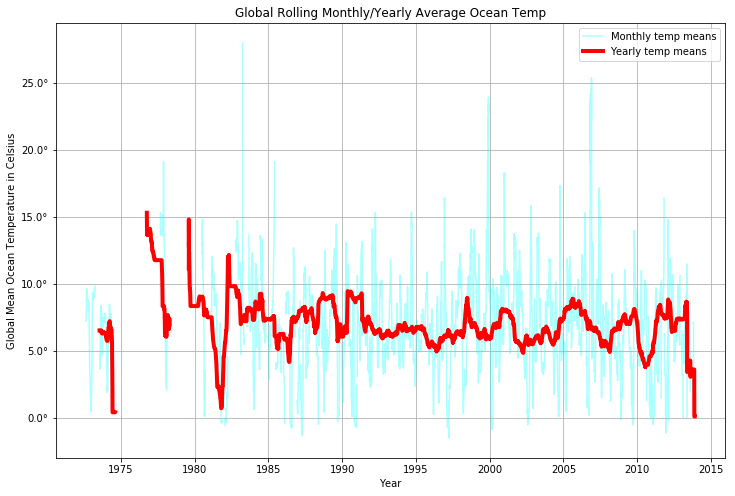

In [58]:
cl.plot_rolling_avgs(df)

In [59]:
## Not much more informative

## First Split Train Test:

MSE is : 1.744


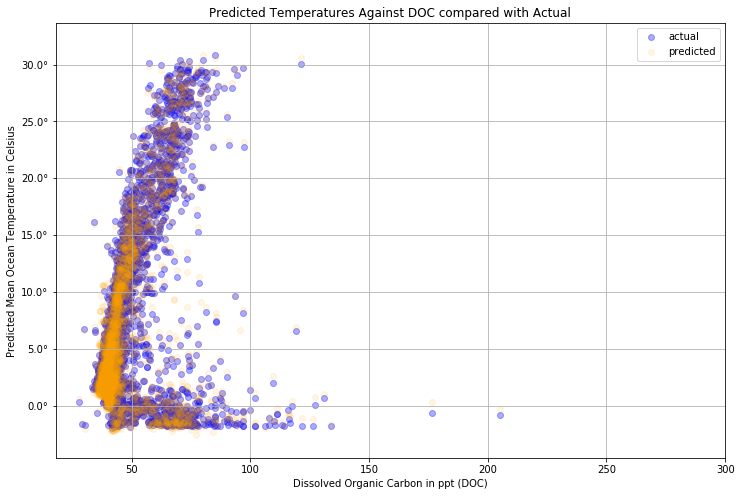

In [37]:
# Same cleaning procedure as for temp, but keep the full dataset
temp_full = cl.simp_temps(df, simp=False)
cl.one_train_test(temp_full)

## K Folds Train

MSE is : 2.093
MSE is : 4.043
MSE is : 4.857
MSE is : 2.844
MSE is : 1.201
MSE is : 1.975
MSE is : 0.782
MSE is : 0.702
MSE is : 0.174
MSE is : 0.598


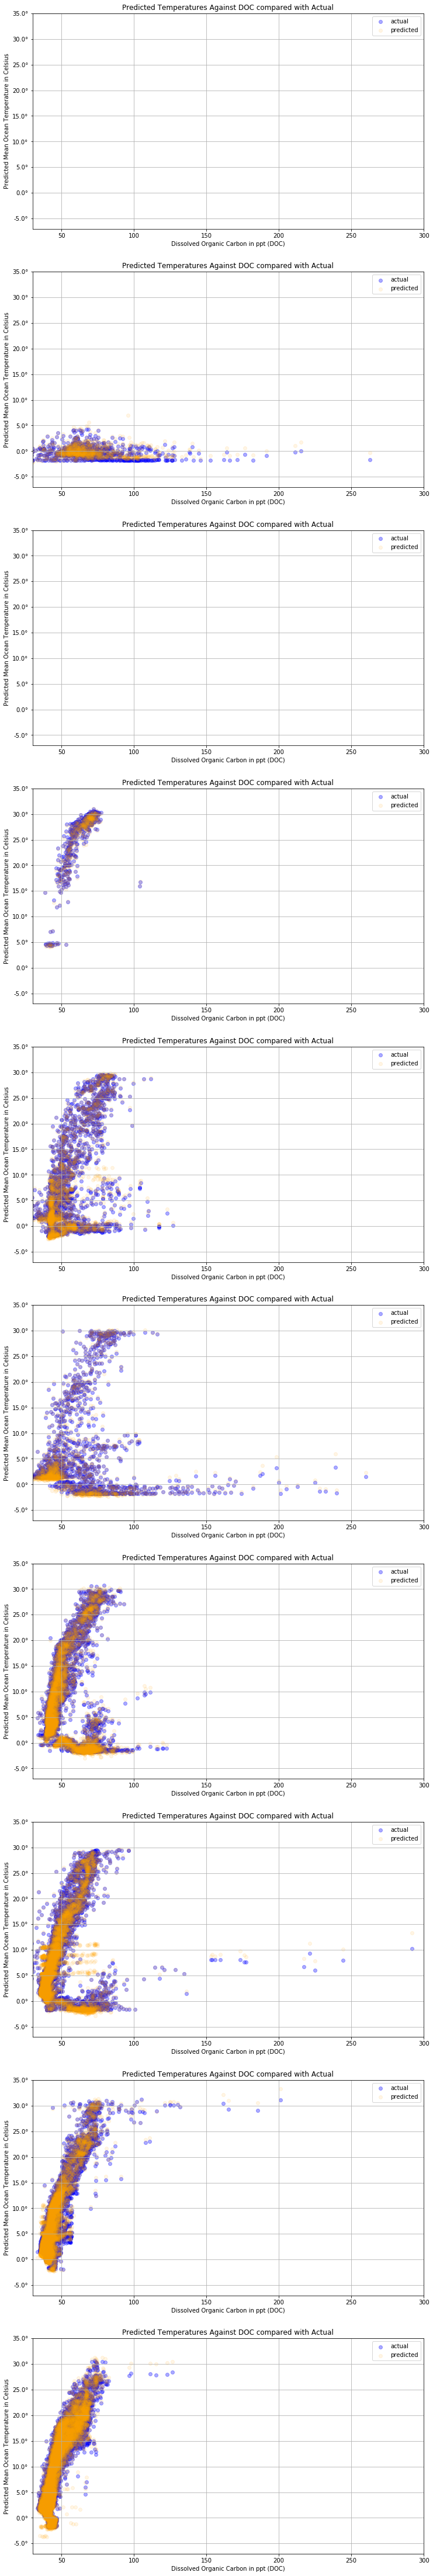

In [48]:
cl.KFolds_plot(temp_full) # 10 folds

## Train Test Split along contiguous time frames (1 year test)

MSE is : 0.125


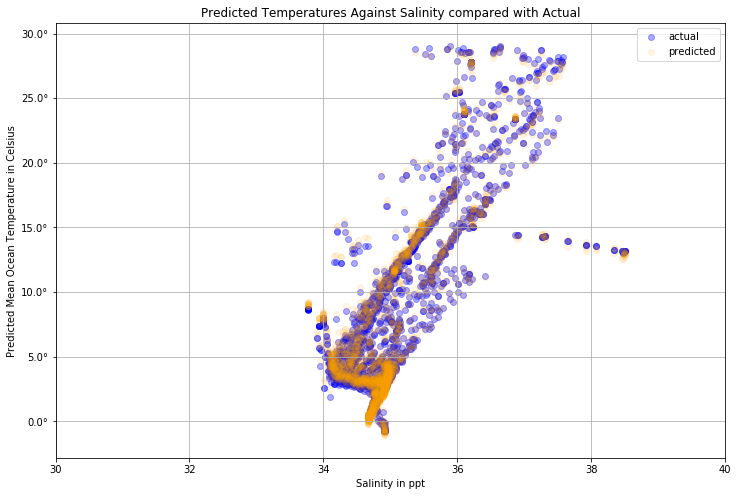

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 0.125)

In [49]:
cl.base_year_isolator(temp_full, 2013, plot=True)

## Do this multiple times -- for all* years!

In [56]:
## Except for holdout year 2013, which we use to test our best performing model
final_model = cl.many_year_isolator(temp_full) # returns best performing model

year not working is: 1975
year not working is: 1976
year not working is: 1979
Best performing model MSE: 0.058


MSE is : 0.125


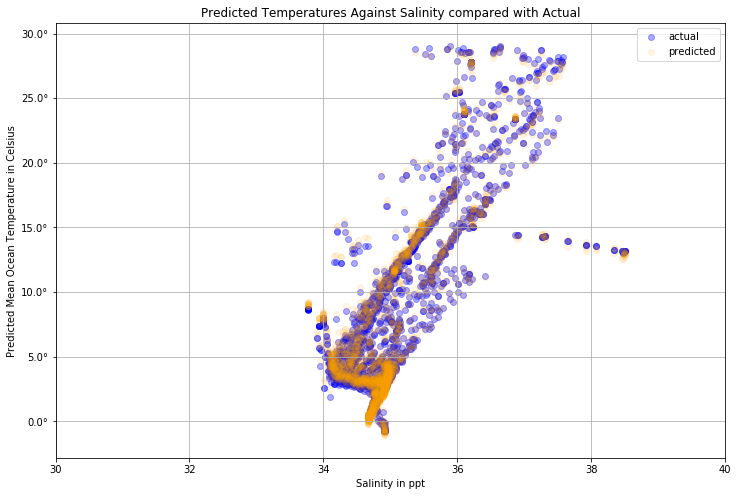

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 0.125)

In [57]:
## See how this final model works on hold out year 2013:
cl.base_year_isolator(temp_full, 2013, plot=True, model=final_model)

In [134]:
cl.see_coefs(temp_full, final_model)

For feature sigma3, our beta (median value * beta coefficient) is 135138.81352964047
For feature sigma0, our beta (median value * beta coefficient) is 34032.03568600073
For feature sigma2, our beta (median value * beta coefficient) is 16497.068551621527
For feature cfc113, our beta (median value * beta coefficient) is 3497.063937119068
For feature neon, our beta (median value * beta coefficient) is 1828.313161527531
For feature o18f, our beta (median value * beta coefficient) is 1785.702442313885
For feature c13f, our beta (median value * beta coefficient) is 660.5704980196061
For feature chla, our beta (median value * beta coefficient) is 559.3597772159357
For feature sf6, our beta (median value * beta coefficient) is 432.1001321831785
For feature hef, our beta (median value * beta coefficient) is 326.31507021170125
For feature cfc11f, our beta (median value * beta coefficient) is 270.9855562825894
For feature cfc12, our beta (median value * beta coefficient) is 205.5560429856326
For 

In [133]:
reload(cl)

<module 'src.cleaners' from '/Users/christopherwinn/active/green_earth/src/cleaners.py'>

In [130]:
temp_full[column_list].median(axis=0)

cruise           297.00000
station           89.00000
cast               1.00000
year            1998.00000
month              6.00000
day               16.00000
hour               0.00000
minute             0.00000
latitude          13.16270
longitude        -19.00000
bottomdepth     4113.00000
maxsampdepth    3584.10000
bottle            14.00000
pressure         601.00000
depth            596.00000
theta              3.19171
salinity          34.69720
salinityf          2.00000
salinityqc         1.00000
sigma0            27.41610
sigma1            32.02500
sigma2            36.52760
sigma3            40.93250
sigma4            45.24320
gamma             27.36860
oxygen           203.00000
oxygenf            2.00000
oxygenqc           1.00000
aou               60.56630
aouf               2.00000
                   ...    
sf6f               9.00000
c13            -9999.00000
c13f               9.00000
c14            -9999.00000
c14f               9.00000
c14err         -9999.00000
h

In [118]:
for i in range(len(out)):
        print(f'For feature {out[i][1]}' )#, our beta (\'normalized\') is {column_coefs[i][1]}')

For feature -99191.1080428838
For feature -90697.46780547939
For feature -4494.252443552803
For feature -2352.5279119152847
For feature -1388.9958049150368
For feature -719.2159288733876
For feature -552.0307250035409
For feature -513.7370228959238
For feature -265.9521361805411
For feature -253.74631391591655
For feature -211.79997359276376
For feature -211.5137856487206
For feature -201.84997634692974
For feature -39.46382311944788
For feature -16.282155046065817
For feature -5.538117398837619
For feature -5.228381336306253
For feature -3.2404640110339367
For feature -2.7616936267909793
For feature -1.576313138435029
For feature -1.4051609679727006
For feature -0.6664622721590276
For feature -0.6179841242521638
For feature -0.3326009614129888
For feature -0.32140335611707554
For feature -0.25196877921649485
For feature -0.19196544346113462
For feature -0.18155482090880584
For feature -0.174706310745538
For feature -0.11265454784184183
For feature -0.10108970565106859
For feature -0.0